<a href="https://colab.research.google.com/github/popogeee/100Day_ML/blob/master/Day_071HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!nvidia-smi

Mon Jul 13 15:29:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    25W /  75W |   1761MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape


(10000, 10)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [28]:
model = Sequential()
model.add(Conv2D(filters=32 ,kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32 ,kernel_size=(3,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32 ,kernel_size=(3,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [29]:
def plot_loss_acc():
    val_loss = history.history["val_loss"]
    loss = history.history["loss"]
    plt.plot(val_loss, label="val_loss")
    plt.plot(loss, label="loss")
    plt.legend()
    plt.show()
    val_accuracy = history.history["val_accuracy"]
    accuracy = history.history["accuracy"]
    plt.plot(val_accuracy, label="val_accuracy")
    plt.plot(accuracy, label="accuracy")
    plt.legend()
    plt.show()

In [30]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=20, batch_size=256, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 4s 107us/step - loss: 1.7566 - accuracy: 0.3607 - val_loss: 1.6408 - val_accuracy: 0.4590
Epoch 2/20
37500/37500 [==============================] - 4s 97us/step - loss: 1.4376 - accuracy: 0.4816 - val_loss: 1.4899 - val_accuracy: 0.5233
Epoch 3/20
37500/37500 [==============================] - 4s 96us/step - loss: 1.3209 - accuracy: 0.5265 - val_loss: 1.4398 - val_accuracy: 0.5193
Epoch 4/20
37500/37500 [==============================] - 4s 96us/step - loss: 1.2189 - accuracy: 0.5651 - val_loss: 1.3299 - val_accuracy: 0.5542
Epoch 5/20
37500/37500 [==============================] - 4s 95us/step - loss: 1.1602 - accuracy: 0.5854 - val_loss: 1.2494 - val_accuracy: 0.6058
Epoch 6/20
37500/37500 [==============================] - 4s 96us/step - loss: 1.1022 - accuracy: 0.6062 - val_loss: 1.2484 - val_accuracy: 0.6181
Epoch 7/20
37500/37500 [==============================] - 4s 96us/s

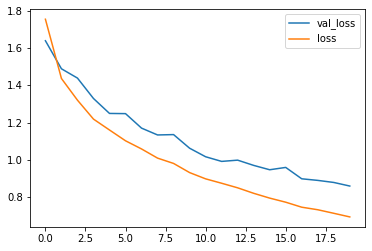

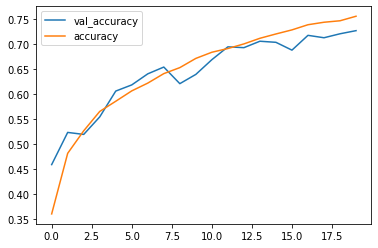

In [31]:
plot_loss_acc()

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 4s 110us/step - loss: 0.1141 - accuracy: 0.9545 - val_loss: 0.1387 - val_accuracy: 0.9466
Epoch 2/20
37500/37500 [==============================] - 4s 101us/step - loss: 0.1110 - accuracy: 0.9559 - val_loss: 0.1448 - val_accuracy: 0.9447
Epoch 3/20
37500/37500 [==============================] - 4s 101us/step - loss: 0.1093 - accuracy: 0.9567 - val_loss: 0.1412 - val_accuracy: 0.9454
Epoch 4/20
37500/37500 [==============================] - 4s 101us/step - loss: 0.1057 - accuracy: 0.9581 - val_loss: 0.1374 - val_accuracy: 0.9468
Epoch 5/20
37500/37500 [==============================] - 4s 101us/step - loss: 0.1050 - accuracy: 0.9582 - val_loss: 0.1340 - val_accuracy: 0.9482
Epoch 6/20
37500/37500 [==============================] - 4s 101us/step - loss: 0.1021 - accuracy: 0.9596 - val_loss: 0.1355 - val_accuracy: 0.9474
Epoch 7/20
37500/37500 [==============================] - 4s 1

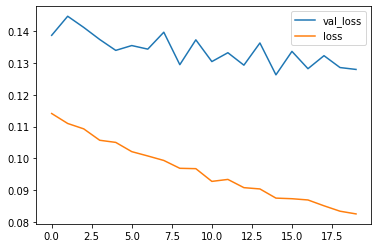

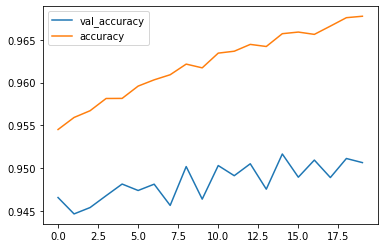

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=20, batch_size=256, verbose=1)
plot_loss_acc()

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 4s 109us/step - loss: 0.0245 - accuracy: 0.8282 - val_loss: 0.0356 - val_accuracy: 0.7491
Epoch 2/20
37500/37500 [==============================] - 4s 100us/step - loss: 0.0236 - accuracy: 0.8347 - val_loss: 0.0356 - val_accuracy: 0.7480
Epoch 3/20
37500/37500 [==============================] - 4s 99us/step - loss: 0.0238 - accuracy: 0.8345 - val_loss: 0.0370 - val_accuracy: 0.7390
Epoch 4/20
37500/37500 [==============================] - 4s 100us/step - loss: 0.0237 - accuracy: 0.8348 - val_loss: 0.0372 - val_accuracy: 0.7356
Epoch 5/20
37500/37500 [==============================] - 4s 101us/step - loss: 0.0235 - accuracy: 0.8348 - val_loss: 0.0363 - val_accuracy: 0.7430
Epoch 6/20
37500/37500 [==============================] - 4s 102us/step - loss: 0.0228 - accuracy: 0.8416 - val_loss: 0.0356 - val_accuracy: 0.7492
Epoch 7/20
37500/37500 [==============================] - 4s 10

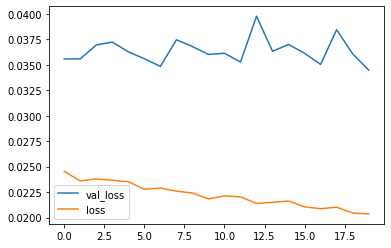

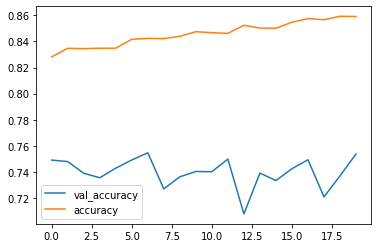

In [33]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=20, batch_size=256, verbose=1)
plot_loss_acc()